In [1]:
# ====================================================
# Kaggle Notebook: Banglish to Bengali with ByT5
# ====================================================

# Siam ARefin 

In [2]:
import pandas as pd

df = pd.read_parquet("hf://datasets/SKNahin/bengali-transliteration-data/data/train-00000-of-00001.parquet")

In [3]:
df.shape

(5006, 2)

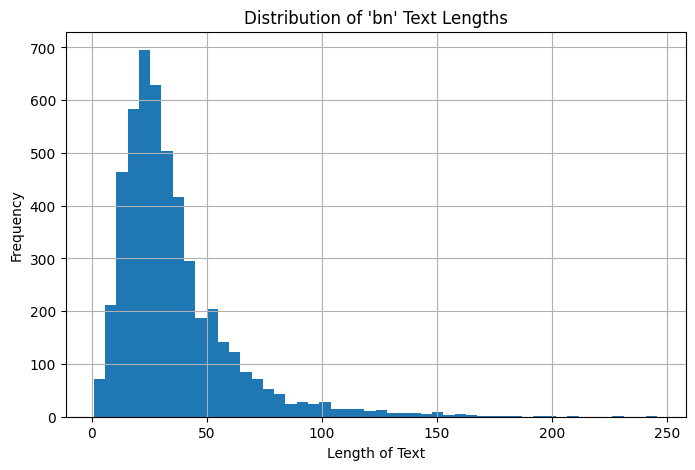

In [4]:
import matplotlib.pyplot as plt

# 1) Calculate the length of the 'bn' text for each row
df["bn_length"] = df["bn"].apply(len)

# 2) Plot the distribution of these lengths as a histogram
plt.figure(figsize=(8, 5))
df["bn_length"].hist(bins=50)  # you can adjust the number of bins as you like
plt.title("Distribution of 'bn' Text Lengths")
plt.xlabel("Length of Text")
plt.ylabel("Frequency")
plt.show()


In [5]:
# For example, remove any rows where length of bn < 3 or length of rm < 3
df = df[df["bn"].str.len() >= 5]
df = df[df["rm"].str.len() >= 5]

# Also remove overly long sequences if you suspect they are noisy
# For instance, remove rows where text is longer than 200 characters
max_length = 100
df = df[df["bn"].str.len() <= max_length]
df = df[df["rm"].str.len() <= max_length]


In [6]:
df.shape

(4791, 3)

In [7]:
from sklearn.model_selection import train_test_split


# 2. Split the DataFrame into train and test (80/20)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print("Total records:", len(df))
print("Train size:", len(train_df))
print("Test size:", len(test_df))


Total records: 4791
Train size: 3832
Test size: 959


In [8]:
train_df

,bn,rm,bn_length
2840,ইমো একাউন্ট ফ্রি তে প্রিমিয়াম করার কোনো ওয়ে আছে,ImO account free te primium korar kono way ace,47
1562,আমি নিজেই পোস্ট করতে চাচ্ছিলাম গুগল লেন্স নিয়ে,Ami nijei post korte chacchilam google lens niye,46
3530,এখনও পোস্ট লিখি নাই লিখছি,Akhono post likhi nai likhchi,26
1824,আমি এই হিরোর ফ্যান,Ami aii heror fan,18
3118,২০টার বেশি হয় না,20tar besi hoi na,16
...,...,...,...
4638,চাইলে পোস্ট করতে পারি,cayle post korte pari,22
525,আগের মতো আবার পোস্ট করা শুরু করবেন,ager moto abar post kora suru korben,34
3292,"লিংক টা দিবেন ভাই একটু কষ্ট করে,","Link Ta Diben Vai Aktu Kosto Kore,",32
3974,আপনার এফবি পেতে পারি//,Apnar fb pete pari??,22


In [9]:
# For calculating WER (Word Error Rate)
! pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.9 MB/s eta 0:00:00a 0:00:01


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(train_df, test_size=0.1, shuffle=True, random_state=3000)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

In [11]:
from datasets import Dataset

ds_train = Dataset.from_pandas(train_df)
ds_eval = Dataset.from_pandas(val_df)

In [12]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq

model_id = "google/mt5-small"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSeq2SeqLM.from_pretrained(model_id)
data_collator = DataCollatorForSeq2Seq(tokenizer)

tokenizer_config.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:551: UserWarning: The sentencepiece tokenizer that you are converting

pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [13]:
!pip install evaluate


/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.1 MB/s eta 0:00:00


In [14]:
df

,bn,rm,bn_length
0,স্ক্রোল করে ২০/৩০ সেকেন্ড এর ভিডিও পান নাই???,scroll kore 20/30 second er video pann nai???,45
1,ও গুলা টরেন্ট সাইট এ পাবেন,o gula Torrent site e paben,26
2,ভক্কর চক্কর পোস্ট একটা করলেই এপ্রুভড.… নিশ্চই ...,vokkor chokkor post akta korlei approved…. nis...,56
3,আমি টেস্ট করেই কোড দিছি…,ami test koreii code disi…,24
4,"এতো কষ্টের কি আছে সাকিবওয়াপ.টক,সাকিবওয়াপ.মল&এআ...","eto koster ki ache shakibwap.tk,shakibwap.ml&a...",86
...,...,...,...
5001,এদের কে মাটি চাপা দেয়া দরকার,Eder ke mati chapa deya dorkar,29
5002,ওদের একদিন বিচার হবে ভাই,Oder ekdin bichar hobe vai,25
5003,অপেক্ষা করেন,Opekkha koren,13
5004,সময় আসবে,Shomoy ashbe,8


In [15]:
def prepare_dataset(sample):
    output = tokenizer(sample["bn"])
    output["labels"] = tokenizer(sample["rm"])['input_ids']
    output["length"] = len(output["labels"])
    #print(output)
    return output


ds_train = ds_train.map(prepare_dataset, remove_columns=ds_train.column_names)
ds_eval = ds_eval.map(prepare_dataset, remove_columns=ds_eval.column_names)

Map:   0%|          | 0/3448 [00:00<?, ? examples/s]

Map:   0%|          | 0/384 [00:00<?, ? examples/s]

In [16]:
import numpy as np
import evaluate

# Load WER metric
wer_metric = evaluate.load("wer")

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    
    if isinstance(preds, tuple):
        preds = preds[0]
    
    preds = np.where(preds != -100, preds, tokenizer.pad_token_id)
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Compute the WER
    result = wer_metric.compute(
        predictions=decoded_preds, references=decoded_labels
    )
    return {"wer": result}


In [ ]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

model_id = "mt5-bangla"

training_args = Seq2SeqTrainingArguments(
    output_dir=model_id,
    group_by_length=True,
    length_column_name="length",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    evaluation_strategy="steps",
    metric_for_best_model="wer",
    greater_is_better=False,
    load_best_model_at_end=True,
    num_train_epochs=20,
    learning_rate=0.0002,
    weight_decay=1e-2,
    predict_with_generate=True,
    generation_max_length=256,
    push_to_hub=False,
    report_to="none",
    save_safetensors=False,
    # fp16=True,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [18]:
trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=tokenizer,
    args=training_args,
    train_dataset=ds_train,
    eval_dataset=ds_eval,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

trainer.train()   

/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,Wer
500,8.531500,4.741209,7.405096


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


TrainOutput(global_step=862, training_loss=7.10286647150522, metrics={'train_runtime': 614.4031, 'train_samples_per_second': 11.224, 'train_steps_per_second': 1.403, 'total_flos': 138011931033600.0, 'train_loss': 7.10286647150522, 'epoch': 2.0})

In [19]:
trainer.save_model(model_id) 

In [20]:
from datasets import Dataset

# Suppose test_df has columns "bn" and "rm"
ds_test = Dataset.from_pandas(test_df)


In [21]:
ds_test = ds_test.map(prepare_dataset, remove_columns=ds_test.column_names)


Map:   0%|          | 0/959 [00:00<?, ? examples/s]

In [ ]:
# Option 1: Evaluate (calculates WER, etc.)
test_metrics = trainer.evaluate(ds_test)
print("Test metrics:", test_metrics)

# Option 2: Get predictions & metrics
predictions, labels, metrics = trainer.predict(ds_test)
print("Test metrics:", metrics)


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Test metrics: {'eval_loss': 4.757904529571533, 'eval_wer': 7.191992123400065, 'eval_runtime': 454.0354, 'eval_samples_per_second': 2.112, 'eval_steps_per_second': 0.264, 'epoch': 2.0}
